# Habitat Suitability under Climate Change

## Study Question: What are the potential climate change impacts on headwater habitats where _Rhododendron maximum_ currently exist?

### Our changing climate is altering where key species can live.This project creates a habitat suitability model for _Rododendron maximum_ using the [MACAv2 dataset](https://www.climatologylab.org/maca.html). This suitability assessment will be based on combining multiple data layers related to soil, topography, and climate. 

### _Rhododendron maximum_ is found in North Carolina and Maine which are both part of the Appalachian Mountains. Dudleya, et al identify _Rhododendron maximum_ as an emerging foundation species following the decline of the American Chestnut and Eastern Hemlock. In addition, "Rhododendron affects numerous riparian forest ecosystem processes, including decomposition and nutrient cycling." Of the four hardiness division established by Sakai, et al, _Rhododendron maximum_ is listed in the very hardy category with a tolerance for temperatures down to -40 F, although the USDA recommends a minimum temperature of -13 F with 150 frost free days. _Rhododendron maximum_ is adapted to medium & coarse textured soils with drought tolerance and medium tolerance for fire. It is found at elevations up to 6200 feet which includes all of Franklin County, ME and most of Jackson County, NC except for the highest peak Richland Balsam on the Blue Ridge Parkway. 


## Climate Models
### This study will look at data from 1988 to 2018 in Jackson County, NC and Franklin County, ME. This historic time period was chosen because of the severe drought on the east coast of the US. According to Changnon, the 1988 drought was the worst in a century. In addition, climate change from 2030 to 2060 will be projected. A range of climate models were selected using a Future Climate Scatter tool from the climate toolbox so that the models have different national origins. For each model, here is some information on the model components and projection for Moscow, Idaho between 2040 and 2069 based upon the RCP8.5 scenario. The scenario assumes high greenhouse gas emissions as the world remains heavily reliant on fossil fuels and continued global economic growth. A key aspect of RCP8.5 is the assumption of minimal implementation of policies aimed at mitigating climate change, so this is a worst case scenario.

* **MIROC5** - Model for Interdisciplinary Research on Climate (Japan)
    * Future projection [Temp. 85.1 F; Precip. 10.1 in.]
    * Integrates multiple components like atmosphere, ocean, land, sea ice, and rivers to study complex interactions 
* **NorESM1-M** - Norwegian Earth System Model (Norway)
    * Future projection [Temp. 88.4 F; Precip. 9.7 in.]
    * Includes components for modeling the atmosphere, ocean, sea ice, land, and biogeochemical processes and capabilities for simulating interactions between chemistry, aerosols, clouds, and radiation.
* **IPSL-CM5A-MR** - Institut Pierre Simon Laplace fifth generation climate model medium resolution (France)
    * Past projection [Temp. 80.0 F; Precip. 8.6 in.]
    *  Includes components for simulating various aspects of the Earth's climate system, including atmospheric physics, ocean dynamics, and land surface processes.
* **GFDL-ESM2M** - Geophysical Fluid Dynamics Laboratory Earth System Model (USA)
    * Past projection [Temp. 79.5 F; Precip. 7.9 in.] 
    * Includes representations of biogeochemical cycles, particularly the carbon cycle. 
### Using both historic and projected climate parameters will inform the habitat suitability analysis for _Rhododendron maximum_ along the Appalachian Mountains.


## Information Sources
* Maura P. Dudleya, Mary Freeman, Seth Wenger, Rhett Jackson, and Catherine M. Pringle. 15 September 2020. Rethinking foundation species in a changing world: the case for Rhododendron maximum as an emerging foundation species in shifting ecosystems of the Southern Appalachians. _Forest Ecology and Management_ Volume 472, p.  118240. available online: https://doi.org/10.1016/j.foreco.2020.118240
* A. Sakai, L. Fuchigami, and C.J. Weiser. 1986. Cold Hardiness in the Genus Rhododendron. _Journal of the American Society for Horticultural Science_ 111(2):273-280. 
* USDA PLANTS Database. available online: https://plants.usda.gov/plant-profile/RHMA4/characteristics
* Flora of North America Association. 2020. available online: http://floranorthamerica.org/Rhododendron_maximum
* Stanley A. Changnon. 01 Sep 1989. The 1988 Drought, Barges, and Diversion. _Bulletin of the American Meteorological Society_ Volume 70: Issue 9 pp:1092-1104. available online: https://journals.ametsoc.org/view/journals/bams/70/9/1520-0477_1989_070_1092_tdbad_2_0_co_2.xml
* Hegewisch, K.C., Laquindanum, V., Fleishman, E., Hartmann, H., and Mills-Novoa, M.. Climate Toolbox Tool Summary series. https://ClimateToolbox.org.
* Explainer: The high-emissions ‘RCP8.5’ global warming scenario. available online at: https://www.carbonbrief.org/explainer-the-high-emissions-rcp8-5-global-warming-scenario/
* Google Gemini was used to identify sources and compile known information. In addition, Google Gemini helped identify coding errors and suggested remedies.

In [17]:
# Import needed packages
import requests # For making HTTP requests
import os # Interoperable file paths
import pathlib  # Work with file and directory paths
import zipfile # Work with zip files

import geopandas as gpd # Work with geospatial data
import rasterio # Read, write, and manipulate raster datasets

# Define and create the project data directories
data_dir = os.path.join(
    pathlib.Path.home(),
    'Documents'
    'eaclassprojects',
    'climate_models',
)
os.makedirs(data_dir, exist_ok=True)
pathlib.Path.home()


WindowsPath('C:/Users/stem2')

Shapefile already exists. Skipping download.


<Axes: >

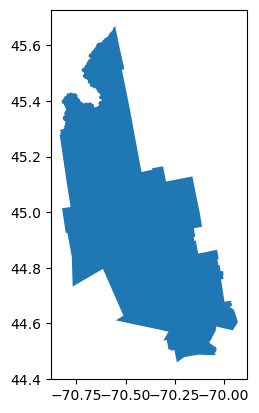

In [22]:
# Define the URL of the shapefile
url = "https://www2.census.gov/geo/tiger/TIGER2023/COUNTY/tl_2023_us_county.zip"

# Download the shapefile to the specified directory
zip_filepath = os.path.join(data_dir, "tl_2023_us_county.zip") # full path to zip file.
shapefile_path = os.path.join(data_dir, "tl_2023_us_county.shp") # Construct the path to the extracted shapefile

# Check if the shapefile already exists
if not os.path.exists(shapefile_path):
    # Download the shapefile only if it doesn't exist
    try:
        response = requests.get(url)
        response.raise_for_status()

        # Extract the shapefile
        with open(zip_filepath, "wb") as f:
            f.write(response.content)
        # Extract the shapefile to the specified directory
        with zipfile.ZipFile(zip_filepath, "r") as zip_ref:
            zip_ref.extractall(data_dir) #extract to the data_dir

        print("Shapefile downloaded and extracted")
    
    except requests.exceptions.RequestException as e:
        print(f"Error downloading shapefile: {e}")
    except zipfile.BadZipFile as e:
        print(f"Error extracting zip file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

else:
    print("Shapefile already exists. Skipping download.")

# Load the shapefile into a GeoDataFrame
county_data = gpd.read_file(shapefile_path)

# Filter for a specific counties 
franklin_county = county_data[(county_data['STATEFP'] == '23') & (county_data['COUNTYFP'] == '007')]
jackson_county = county_data[(county_data['STATEFP'] == '37') & (county_data['COUNTYFP'] == '099')]

# Plot the shapefile
franklin_county.plot()

<Axes: >

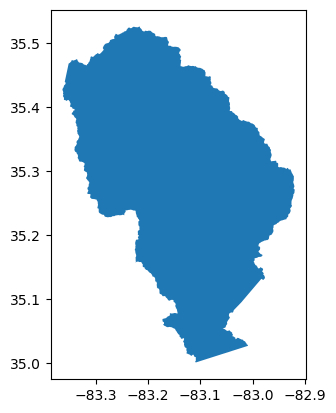

In [12]:
jackson_county.plot()

## STEP 2: DATA ACCESS

### Soil data

The [POLARIS dataset](http://hydrology.cee.duke.edu/POLARIS/) is a
convenient way to uniformly access a variety of soil parameters such as
pH and percent clay in the US. It is available for a range of depths (in
cm) and split into 1x1 degree tiles.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Write a <strong>function with a numpy-style docstring</strong> that
will download POLARIS data for a particular location, soil parameter,
and soil depth. Your function should account for the situation where
your site boundary crosses over multiple tiles, and merge the necessary
data together.</p>
<p>Then, use loops to download and organize the rasters you will need to
complete this section. Include soil parameters that will help you to
answer your scientific question. We recommend using a soil depth that
best corresponds with the rooting depth of your species.</p></div></div>

In [2]:
# Download soil data

### Topographic data

One way to access reliable elevation data is from the [SRTM
dataset](https://www.earthdata.nasa.gov/data/instruments/srtm),
available through the [earthaccess
API](https://earthaccess.readthedocs.io/en/latest/quick-start/).

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Write a <strong>function with a numpy-style docstring</strong> that
will download SRTM elevation data for a particular location and
calculate any additional topographic variables you need such as slope or
aspect.</p>
<p>Then, use loops to download and organize the rasters you will need to
complete this section. Include topographic parameters that will help you
to answer your scientific question.</p></div></div>

> **Warning**
>
> Be careful when computing the slope from elevation that the units of
> elevation match the projection units (e.g. meters and meters, not
> meters and degrees). You will need to project the SRTM data to
> complete this calculation correctly.

In [3]:
# Download soil data

### Climate model data

You can use MACAv2 data for historical and future climate data. Be sure
to compare at least two 30-year time periods (e.g. historical vs. 10
years in the future) for at least four of the CMIP models. Overall, you
should be downloading at least 8 climate rasters for each of your sites,
for a total of 16. **You will *need* to use loops and/or functions to do
this cleanly!**.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Write a <strong>function with a numpy-style docstring</strong> that
will download MACAv2 data for a particular climate model, emissions
scenario, spatial domain, and time frame. Then, use loops to download
and organize the 16+ rasters you will need to complete this section. The
<a
href="http://thredds.northwestknowledge.net:8080/thredds/reacch_climate_CMIP5_macav2_catalog2.html">MACAv2
dataset is accessible from their Thredds server</a>. Include an
arrangement of sites, models, emissions scenarios, and time periods that
will help you to answer your scientific question.</p></div></div>

In [4]:
# Download climate data

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>Make sure to include a description of the climate data and how you
selected your models. Include a citation of the MACAv2 data</p></div></div>

YOUR CLIMATE DATA DESCRIPTION AND CITATIONS HERE

## STEP 3: HARMONIZE DATA

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure that the grids for all your data match each other. Check
out the <a
href="https://corteva.github.io/rioxarray/stable/examples/reproject_match.html#Reproject-Match"><code>ds.rio.reproject_match()</code>
method</a> from <code>rioxarray</code>. Make sure to use the data source
that has the highest resolution as a template!</p></div></div>

> **Warning**
>
> If you are reprojecting data as you need to here, the order of
> operations is important! Recall that reprojecting will typically tilt
> your data, leaving narrow sections of the data at the edge blank.
> However, to reproject efficiently it is best for the raster to be as
> small as possible before performing the operation. We recommend the
> following process:
>
>     1. Crop the data, leaving a buffer around the final boundary
>     2. Reproject to match the template grid (this will also crop any leftovers off the image)

In [5]:
# Download soil data

## STEP 4: DEVELOP A FUZZY LOGIC MODEL

A fuzzy logic model is one that is built on expert knowledge rather than
training data. You may wish to use the
[`scikit-fuzzy`](https://pythonhosted.org/scikit-fuzzy/) library, which
includes many utilities for building this sort of model. In particular,
it contains a number of **membership functions** which can convert your
data into values from 0 to 1 using information such as, for example, the
maximum, minimum, and optimal values for soil pH.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>To train a fuzzy logic habitat suitability model:</p>
<pre><code>1. Research S. nutans, and find out what optimal values are for each variable you are using (e.g. soil pH, slope, and current climatological annual precipitation). 
2. For each **digital number** in each raster, assign a **continuous** value from 0 to 1 for how close that grid square is to the optimum range (1=optimal, 0=incompatible). 
3. Combine your layers by multiplying them together. This will give you a single suitability number for each square.
4. Optionally, you may apply a suitability threshold to make the most suitable areas pop on your map.</code></pre></div></div>

> **Tip**
>
> If you use mathematical operators on a raster in Python, it will
> automatically perform the operation for every number in the raster.
> This type of operation is known as a **vectorized** function. **DO NOT
> DO THIS WITH A LOOP!**. A vectorized function that operates on the
> whole array at once will be much easier and faster.

In [6]:
# Create fuzzy logic suitability model

## STEP 5: PRESENT YOUR RESULTS

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Generate some plots that show your key findings. Don’t forget to
interpret your plots!</p></div></div>

In [7]:
# Create plots

YOUR PLOT INTERPRETATION HERE